In [1]:
import eland as ed
import numpy as np
import matplotlib.pyplot as plt
import os

from elasticsearch import Elasticsearch
from dotenv import load_dotenv
from app.utils.backtesting_utils import get_ad

os.chdir("..")
load_dotenv()

True

In [2]:
es_url = os.environ.get('ELASTICSEARCH_URL')
es_api_key = os.environ.get('ELASTICSEARCH_API_KEY')
es = Elasticsearch(hosts=[f"{es_url}"], api_key=es_api_key)

In [3]:
%%capture
ticker="IBM"
df_eod = ed.DataFrame(es, es_index_pattern="quant-agents_stocks-eod_*")
df_eod = df_eod[(df_eod.key_ticker == ticker)]
df_ad = ed.eland_to_pandas(df_eod).sort_values(by='date_reference', ascending=True).tail(100).set_index('date_reference')
df_ad, df_crossovers = get_ad(df_ad)

In [4]:
df_ad.tail()

,key_ticker,val_close,val_high,val_low,val_open,val_volume,clv,ad_contrib,ad_line,ad_change,position,returns,strategy
date_reference,,,,,,,,,,,,,
2025-10-20,IBM,283.65,285.5000,280.9600,281.25,3494336,0.185022,6.465291e+05,2.889624e+07,6.465291e+05,1,0.008390,0.008390
2025-10-21,IBM,282.05,285.3100,281.6000,283.31,4080981,-0.757412,-3.090986e+06,2.580525e+07,-3.090986e+06,-1,-0.005657,-0.005657
2025-10-22,IBM,287.51,289.1700,281.3500,281.99,10538480,0.575448,6.064343e+06,3.186959e+07,6.064343e+06,1,0.019173,-0.019173
2025-10-23,IBM,285.00,285.5791,263.5623,264.95,16676394,0.947395,1.579913e+07,4.766872e+07,1.579913e+07,1,-0.008768,-0.008768
2025-10-24,IBM,307.46,310.7500,282.2100,283.77,16914243,0.769446,1.301460e+07,6.068332e+07,1.301460e+07,1,0.075856,0.075856


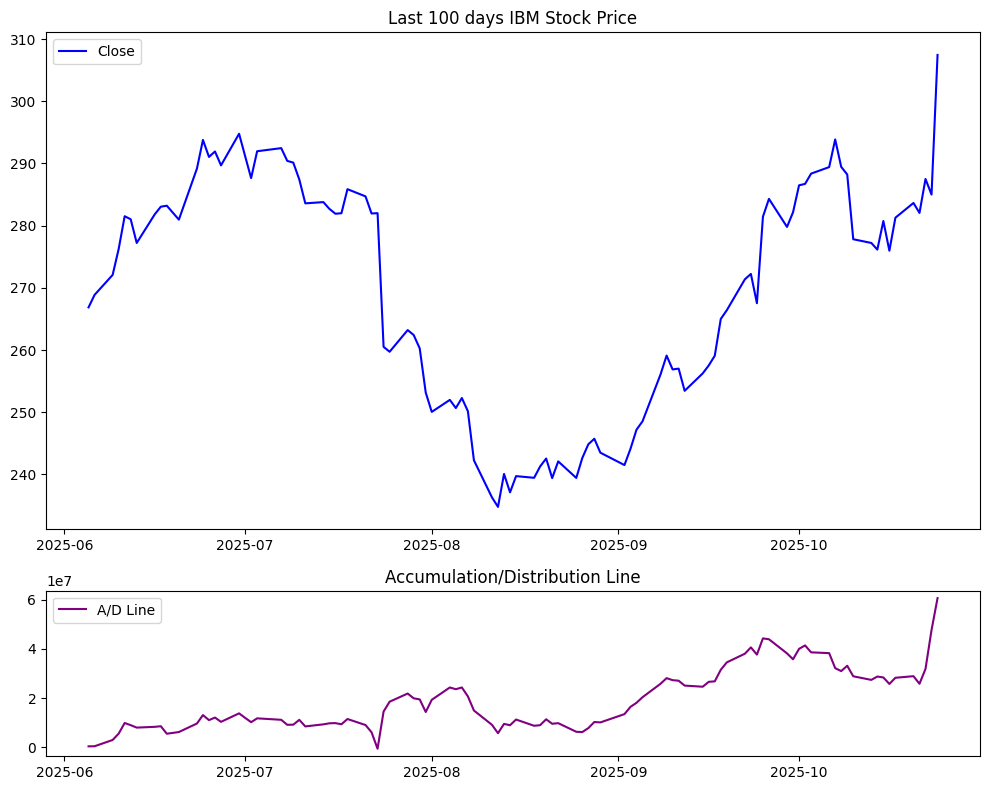

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Top: Price plot
axs[0].plot(df_ad.index, df_ad['val_close'], label='Close', color='blue')
axs[0].set_title(f"Last 100 days {ticker} Stock Price")
axs[0].legend()

# Bottom: A/D Line plot
axs[1].plot(df_ad.index, df_ad['ad_line'], label='A/D Line', color='purple')
axs[1].set_title('Accumulation/Distribution Line')
axs[1].legend()

plt.tight_layout()
plt.show()

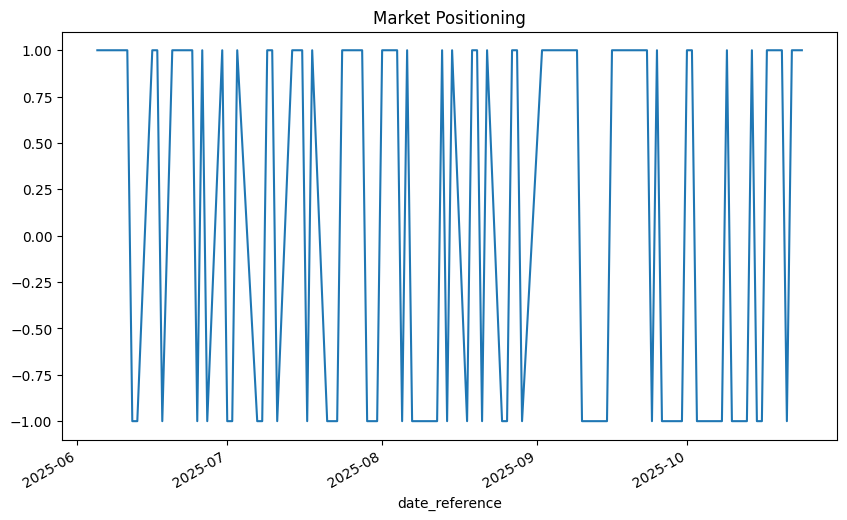

In [6]:
df_ad['position'].plot(
    ylim=[-1.1, 1.1],
    title='Market Positioning',
    figsize=(10, 6)
);

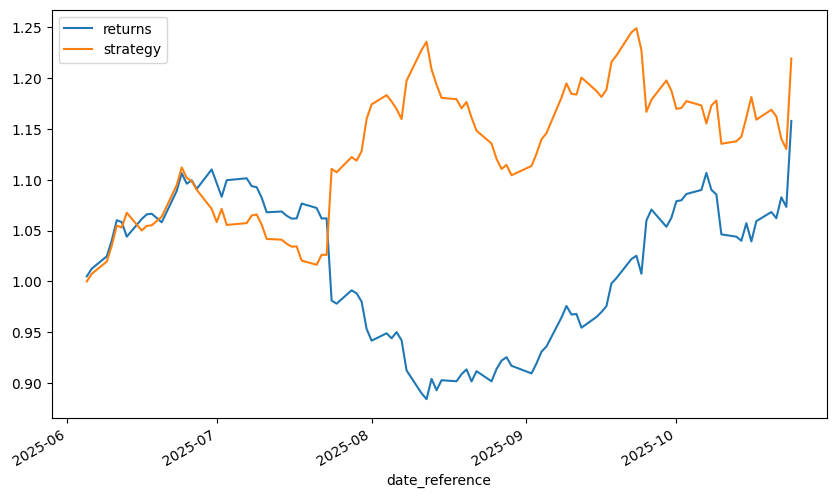

In [7]:
df_ad[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [8]:
df_crossovers[['val_close', 'ad_line', 'ad_change', 'position']]

,val_close,ad_line,ad_change,position
date_reference,,,,
2025-06-12,281.03,8.966027e+06,-8.783114e+05,-1
2025-06-16,281.83,8.283270e+06,3.122318e+05,1
2025-06-18,283.21,5.480956e+06,-3.053400e+06,-1
2025-06-20,280.97,6.168776e+06,6.878203e+05,1
2025-06-25,291.06,1.101535e+07,-2.052939e+06,-1
2025-06-26,291.93,1.205090e+07,1.035545e+06,1
2025-06-27,289.70,1.031611e+07,-1.734783e+06,-1
2025-06-30,294.78,1.376790e+07,3.451785e+06,1
2025-07-01,291.20,1.195312e+07,-1.814778e+06,-1
